In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('GRE_Reg_Data (1).csv')

In [3]:
data.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,1700,0,NaN
1,220314085,7/22/2022,5/12/2020,1110,27,F
2,222013040,8/6/2022,6/4/2020,1620,60,M
3,220614831,8/18/2022,8/17/2020,1200,28,M
4,231207725,2/27/2023,1/27/2020,635,37,M


In [4]:
data.shape

(247988, 6)

In [5]:
data.columns

Index(['REGISTRATION_NO', 'Date Registered', 'DATE OF EXAM OCC', 'TIME OCC',
       'Age', 'Sex'],
      dtype='object')

In [6]:
data['REGISTRATION_NO'].unique()

array([221412410, 220314085, 222013040, ..., 231606525, 231210064,
       230906458], dtype=int64)

In [7]:
data['REGISTRATION_NO'].value_counts()

REGISTRATION_NO
221412410    1
230109780    1
230304513    1
231506348    1
231411418    1
            ..
231307829    1
220212493    1
221416217    1
221814513    1
230906458    1
Name: count, Length: 247988, dtype: int64

In [8]:
data.isnull().sum()

REGISTRATION_NO         0
Date Registered         0
DATE OF EXAM OCC        0
TIME OCC                0
Age                     0
Sex                 32248
dtype: int64

In [9]:
data.dropna()
data.isnull().sum()

REGISTRATION_NO         0
Date Registered         0
DATE OF EXAM OCC        0
TIME OCC                0
Age                     0
Sex                 32248
dtype: int64

In [10]:
data.shape

(247988, 6)

In [11]:
data.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,1700,0,NaN
1,220314085,7/22/2022,5/12/2020,1110,27,F
2,222013040,8/6/2022,6/4/2020,1620,60,M
3,220614831,8/18/2022,8/17/2020,1200,28,M
4,231207725,2/27/2023,1/27/2020,635,37,M


In [12]:
# Extract hour from exam_time
data.loc[:, 'DATE OF EXAM OCC'] = pd.to_datetime(data['DATE OF EXAM OCC'], format='%m/%d/%Y')

In [13]:
data.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,2020-11-12 00:00:00,1700,0,NaN
1,220314085,7/22/2022,2020-05-12 00:00:00,1110,27,F
2,222013040,8/6/2022,2020-06-04 00:00:00,1620,60,M
3,220614831,8/18/2022,2020-08-17 00:00:00,1200,28,M
4,231207725,2/27/2023,2020-01-27 00:00:00,635,37,M


In [14]:
def parse_time(x):
    try:
        return pd.to_datetime(x, format='%H%M').time()
    except ValueError:
        return None

In [17]:
# Convert 'TIME OCC' to datetime to extract the hour
data['TIME OCC PARSED'] = data['TIME OCC'].apply(parse_time)

In [22]:
data = data.dropna(subset=['TIME OCC'])

In [23]:
def get_day_night(time):
    hour = time.hour
    if 6 <= hour < 21:
        return 'Day'
    else:
        return 'Night'

In [25]:
# Ensure TIME OCC values are zero-padded to always have four digits
data['HOUR OCC'] = data['TIME OCC PARSED'].apply(lambda x: x.hour)

In [26]:
data.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,TIME OCC PARSED,DAY_NIGHT,HOUR OCC
0,221412410,6/15/2022,2020-11-12 00:00:00,1700,0,NaN,17:00:00,Day,17
1,220314085,7/22/2022,2020-05-12 00:00:00,1110,27,F,11:10:00,Day,11
2,222013040,8/6/2022,2020-06-04 00:00:00,1620,60,M,16:20:00,Day,16
3,220614831,8/18/2022,2020-08-17 00:00:00,1200,28,M,12:00:00,Day,12
4,231207725,2/27/2023,2020-01-27 00:00:00,635,37,M,06:35:00,Day,6


In [30]:
# Convert TIME OCC to a proper datetime format and extract the hour
hourly_counts = data['HOUR OCC'].value_counts().sort_index()

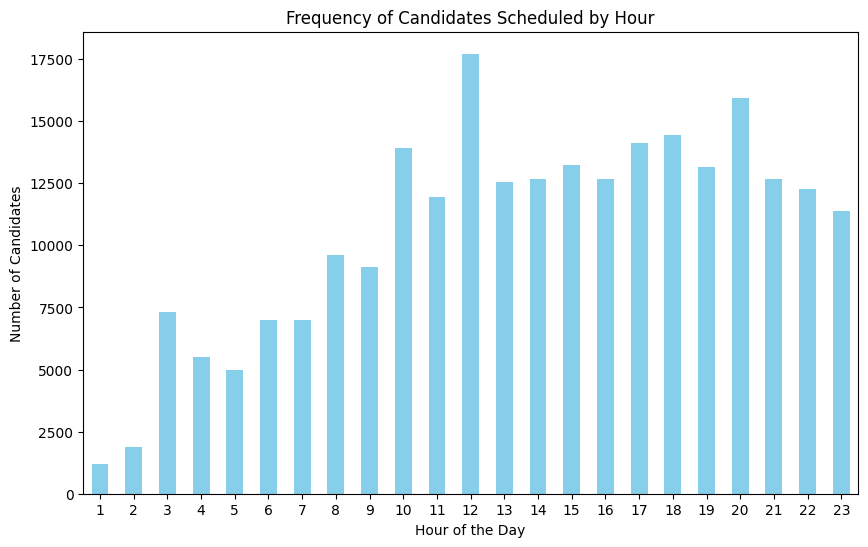

In [31]:
# Task 1: Plotting the frequency of candidates scheduled by hour
# Plotting the frequency of candidates scheduled by hour
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar',color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Candidates')
plt.title('Frequency of Candidates Scheduled by Hour')
plt.xticks(rotation=0)
plt.show()

In [32]:
# Task 2: Creating a stacked bar graph of candidates taking exams during the day and night
def get_day_night(hour):
    if 6 <= hour < 21:  # 06:00 AM to 09:00 PM
        return 'Day'
    else:
        return 'Night'

In [43]:
# Task: Find the hour with the highest frequency of candidates scheduled to take up exams
data['DAY_NIGHT'] = data['HOUR OCC'].apply(get_day_night)

In [34]:
day_night_counts = data['DAY_NIGHT'].value_counts()

In [50]:
day_counts = data[data['DAY_NIGHT'] == 'Day']['TIME OCC PARSED'].value_counts().sort_index()
night_counts = data[data['DAY_NIGHT'] == 'Night']['TIME OCC PARSED'].value_counts().sort_index()
day_night_df = pd.DataFrame({'Day': day_counts, 'Night': night_counts}).fillna(0)
print("Day counts:\n", day_counts)
print("Night counts:\n", night_counts)

Day counts:
 TIME OCC PARSED
06:00:00    2319
06:01:00      64
06:02:00      58
06:03:00      70
06:04:00      53
            ... 
20:55:00     204
20:56:00      26
20:57:00      25
20:58:00      31
20:59:00      14
Name: count, Length: 900, dtype: int64
Night counts:
 TIME OCC PARSED
01:00:00    515
01:01:00     34
01:02:00     42
01:03:00     31
01:04:00     25
           ... 
23:55:00    262
23:56:00     13
23:57:00     14
23:58:00     27
23:59:00    167
Name: count, Length: 400, dtype: int64


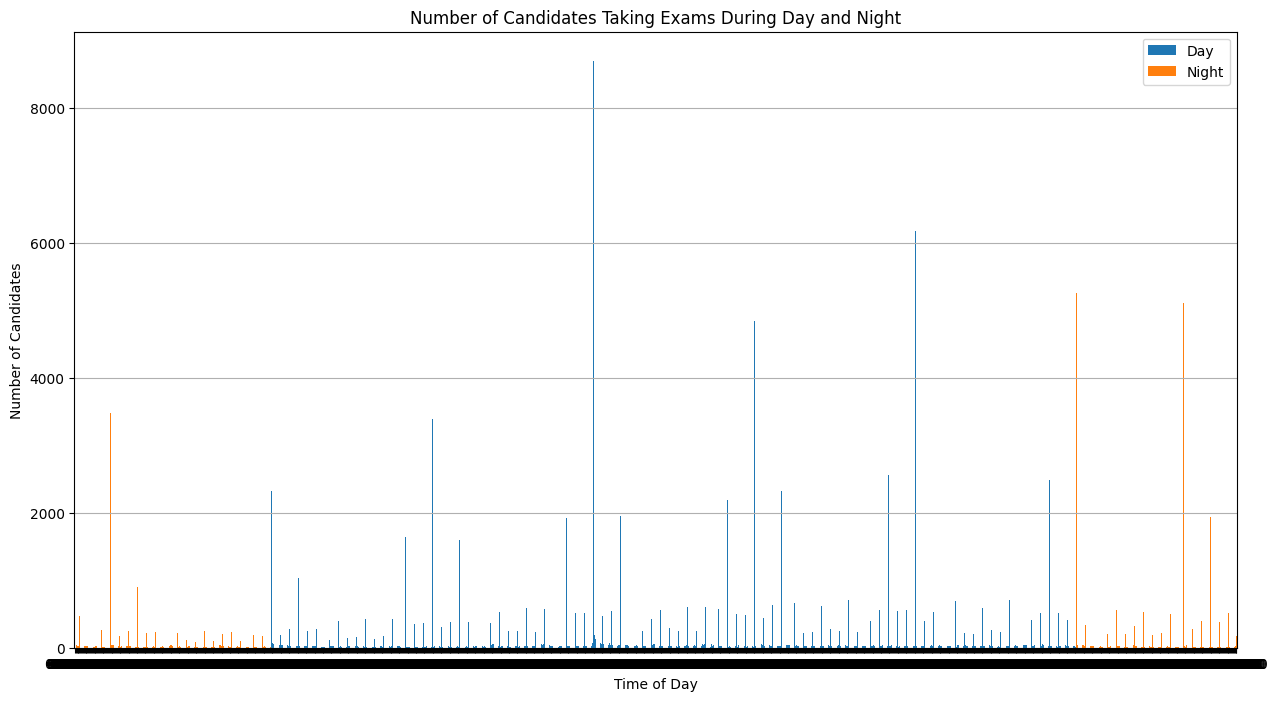

In [56]:

day_night_df.plot(kind='bar', stacked=True, figsize=(15, 8), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Time of Day')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates Taking Exams During Day and Night')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [46]:
# Task 3: Categorizing candidates by age groups and counting the number in each group
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]
labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']
data['AGE GROUP'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [47]:
age_group_counts = data['AGE GROUP'].value_counts().sort_index()

In [59]:
age_group_counts
print("Age counts:\n", age_group_counts)

Age counts:
 AGE GROUP
0-17     64735
18-25    23834
26-34    46012
35-44    42650
45-54    28590
55-64    20615
65+      15867
Name: count, dtype: int64


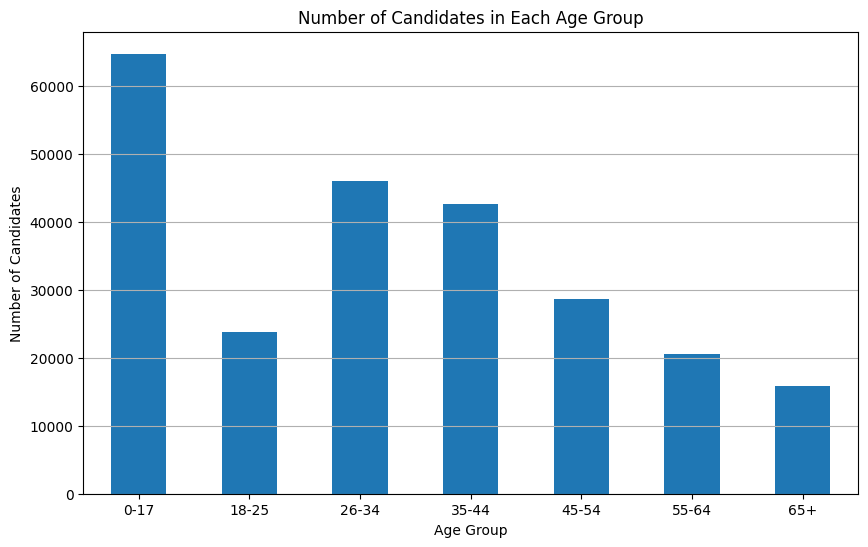

In [60]:
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Candidates')
plt.title('Number of Candidates in Each Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()